In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rainfall-redication/rainfall_aus.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv(r'/kaggle/input/rainfall-redication/rainfall_aus.csv')

In [4]:
import warnings
warnings.simplefilter('ignore')

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.shape

(145460, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [10]:
for feature in df.columns:
    print(f'{feature} has {df[feature].isnull().sum()} null values')

Date has 0 null values
Location has 0 null values
MinTemp has 1485 null values
MaxTemp has 1261 null values
Rainfall has 3261 null values
Evaporation has 62790 null values
Sunshine has 69835 null values
WindGustDir has 10326 null values
WindGustSpeed has 10263 null values
WindDir9am has 10566 null values
WindDir3pm has 4228 null values
WindSpeed9am has 1767 null values
WindSpeed3pm has 3062 null values
Humidity9am has 2654 null values
Humidity3pm has 4507 null values
Pressure9am has 15065 null values
Pressure3pm has 15028 null values
Cloud9am has 55888 null values
Cloud3pm has 59358 null values
Temp9am has 1767 null values
Temp3pm has 3609 null values
RainToday has 3261 null values
RainTomorrow has 3267 null values


## Data Analysis

In [11]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_feature)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
df[cat_feature].sample(10)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
17098,12-09-2014,Newcastle,NaN,NaN,NaN,Yes,No
60371,07-04-2015,Bendigo,SSW,S,S,No,Yes
55565,09-03-2010,Ballarat,WSW,W,SW,Yes,Yes
143737,01-02-2017,Katherine,E,NNW,ENE,NaN,NaN
47021,04-11-2011,Canberra,ENE,SSE,NNW,No,No
71395,30-10-2011,Mildura,SSW,S,S,No,No
65394,18-05-2012,MelbourneAirport,N,N,N,No,Yes
142723,24-04-2014,Katherine,SSE,SE,ESE,No,No
36408,25-02-2017,SydneyAirport,SSW,SSW,SSW,Yes,Yes
56983,24-04-2014,Ballarat,SSW,SW,S,No,No


In [13]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [14]:
df[num_feature].sample(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
23876,13.2,20.5,0.0,12.6,NaN,39.0,15.0,17.0,48.0,47.0,1024.7,1021.4,8.0,NaN,18.8,19.2
74066,9.4,25.4,0.0,NaN,NaN,56.0,22.0,31.0,53.0,29.0,1012.1,1009.0,NaN,NaN,15.9,23.8
75119,8.6,18.8,0.0,0.8,4.7,17.0,9.0,6.0,87.0,69.0,1022.1,1021.7,7.0,5.0,12.4,18.2
81622,8.1,14.1,0.2,3.6,3.9,39.0,19.0,26.0,69.0,69.0,1027.3,1026.3,NaN,NaN,11.9,12.0
109936,10.3,17.6,2.2,4.6,6.8,NaN,22.0,7.0,67.0,55.0,1001.5,999.9,7.0,7.0,13.6,16.0
50364,-3.4,19.9,0.0,NaN,NaN,33.0,4.0,19.0,67.0,28.0,1023.6,1019.7,NaN,NaN,5.1,18.7
74822,9.1,29.2,0.0,NaN,NaN,37.0,24.0,11.0,48.0,19.0,1012.0,1006.8,NaN,NaN,16.3,28.3
79900,6.4,13.3,3.2,1.0,4.6,83.0,24.0,24.0,87.0,83.0,994.4,1001.4,7.0,5.0,7.9,11.7
23913,18.5,22.5,0.0,4.2,NaN,54.0,28.0,30.0,71.0,76.0,1020.0,1016.8,8.0,7.0,21.2,20.9
104919,4.7,14.0,0.4,3.5,8.6,37.0,NaN,NaN,61.0,47.0,1031.4,1030.9,5.0,4.0,10.7,13.8


In [15]:
cat_feature1=[feature for feature in cat_feature if len(df[feature].unique())<25 ]

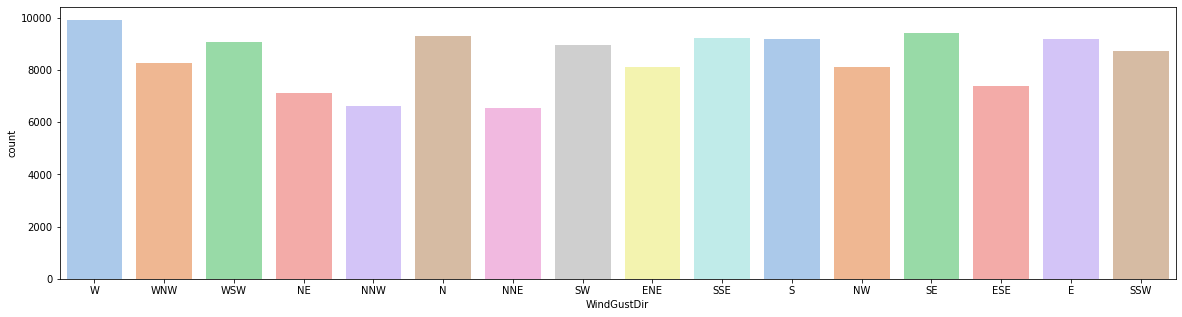

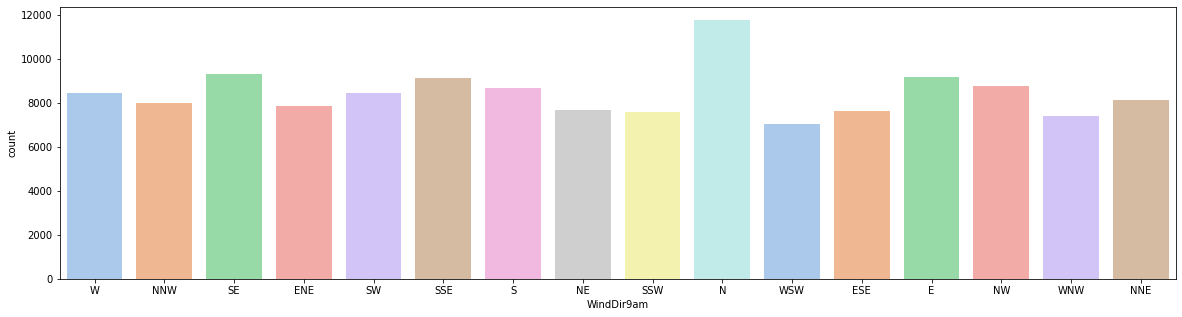

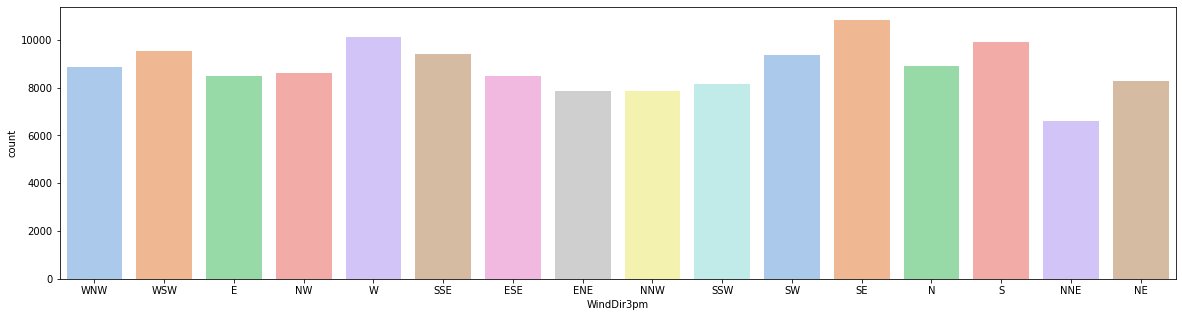

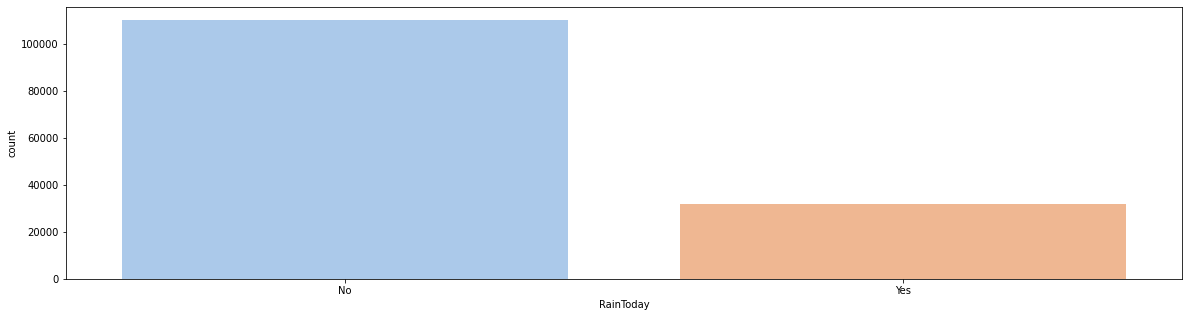

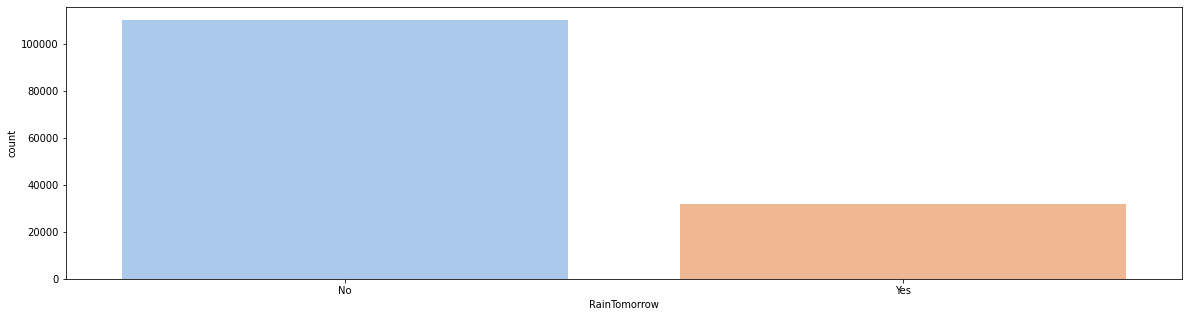

In [16]:
for feature in cat_feature1:
    fig = plt.figure(figsize=(20, 5))
    sns.countplot(df[feature],data=df,palette='pastel')
    plt.show()

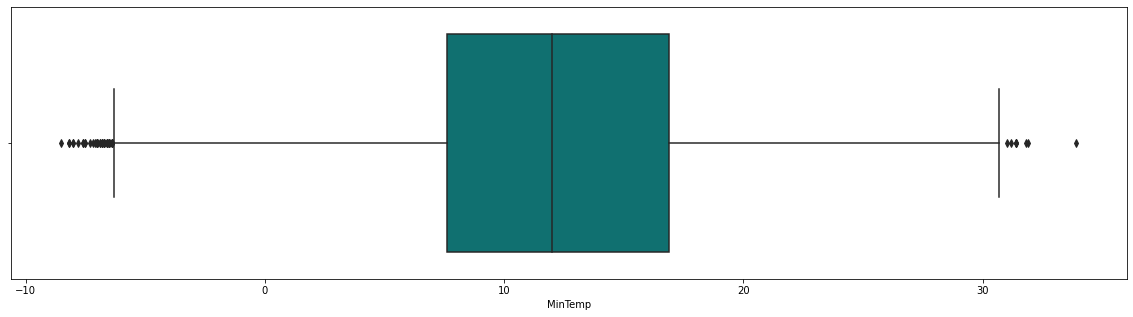

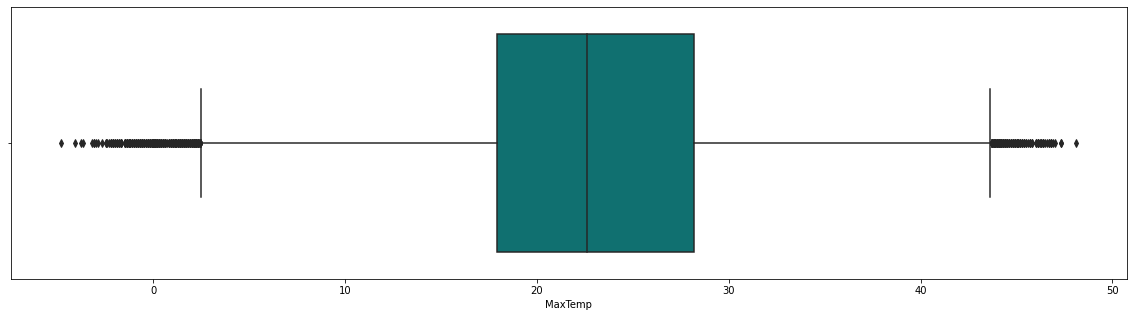

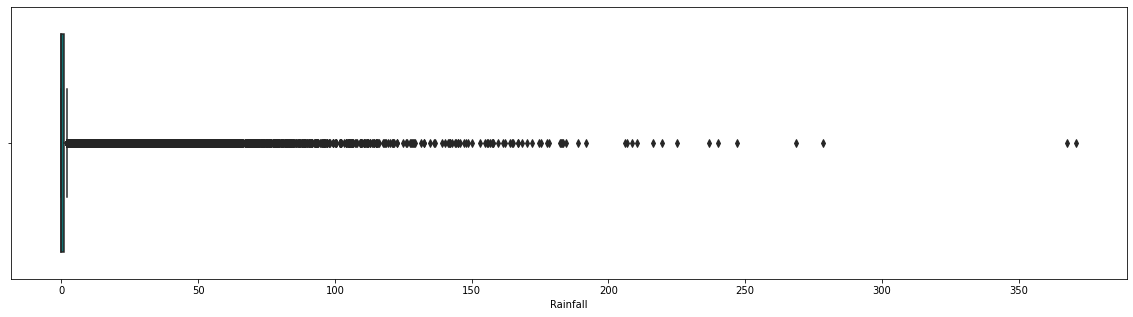

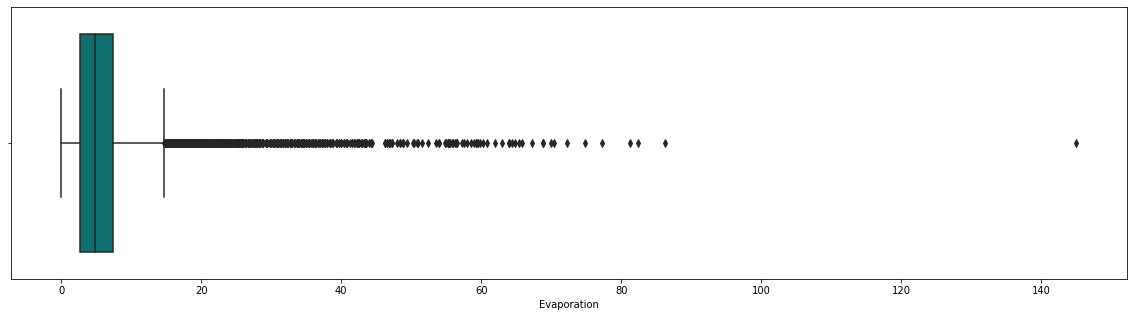

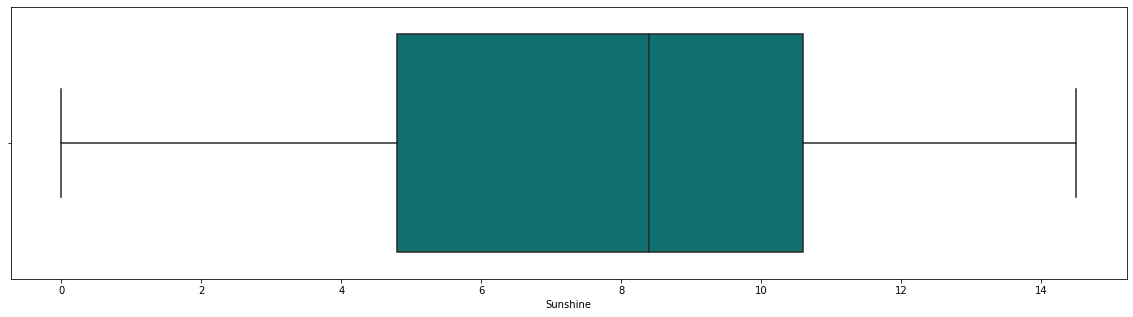

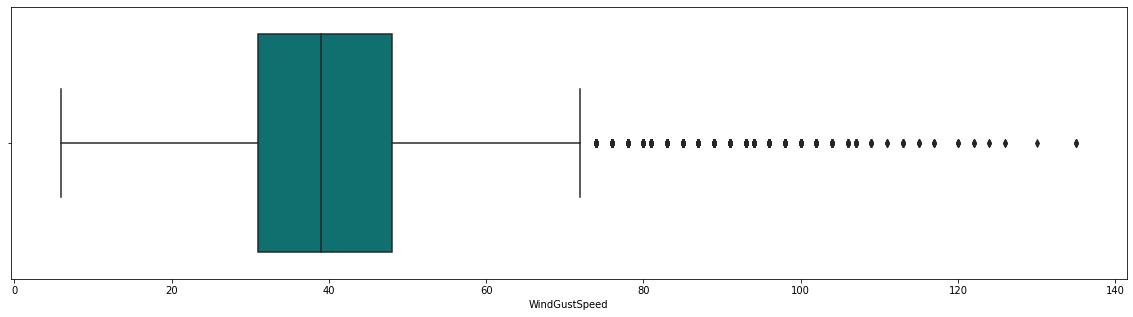

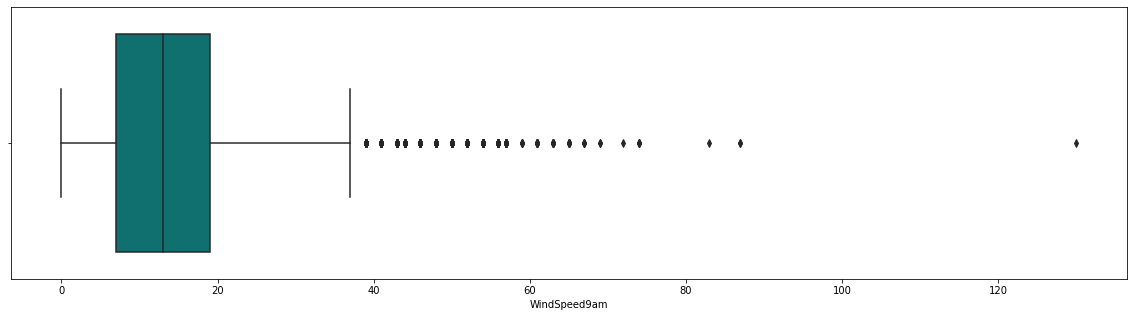

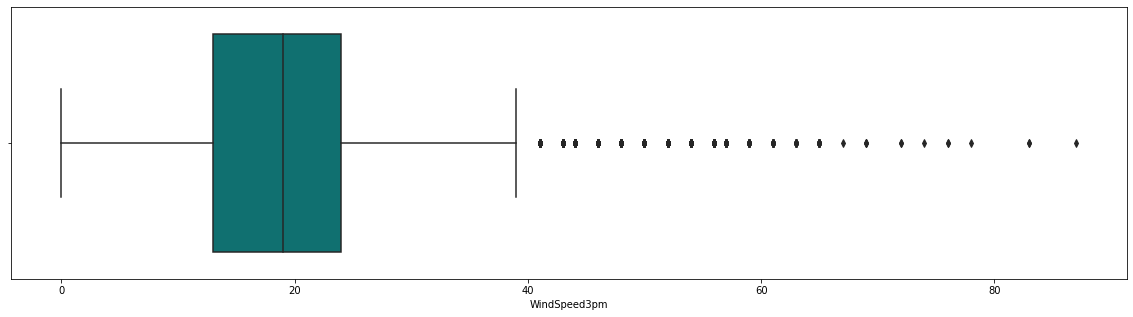

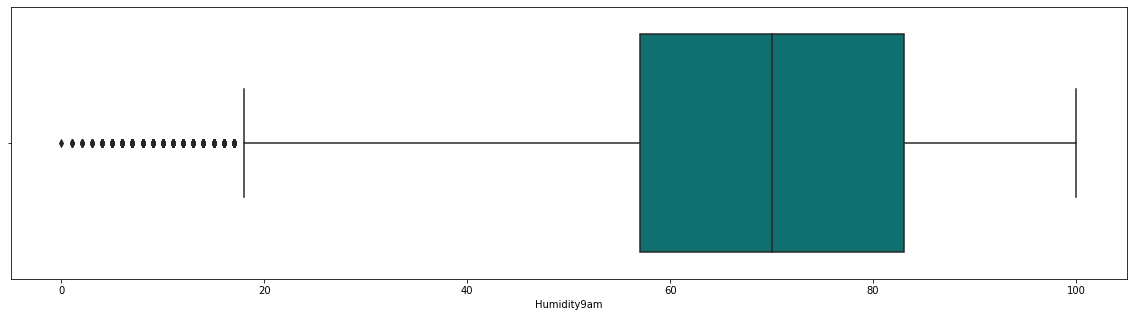

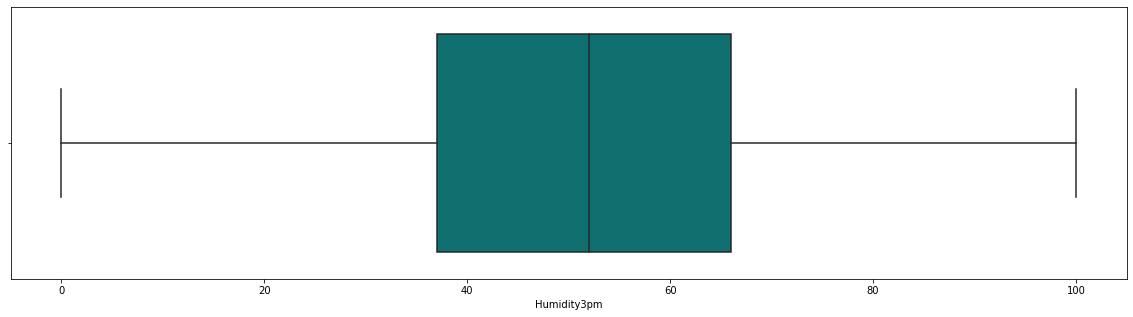

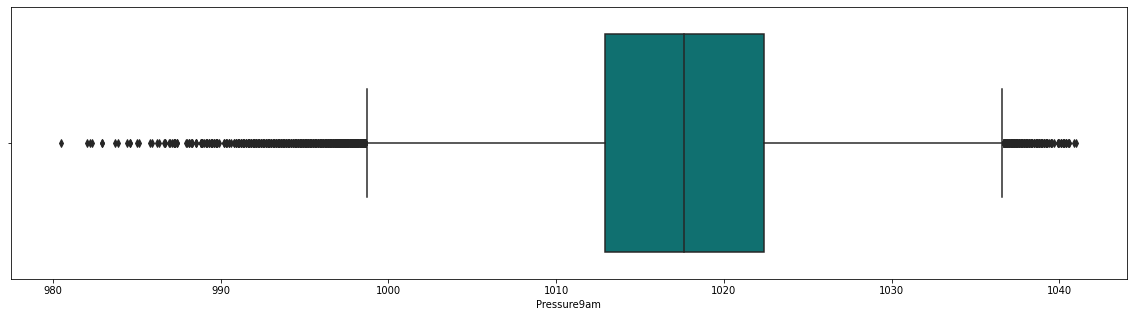

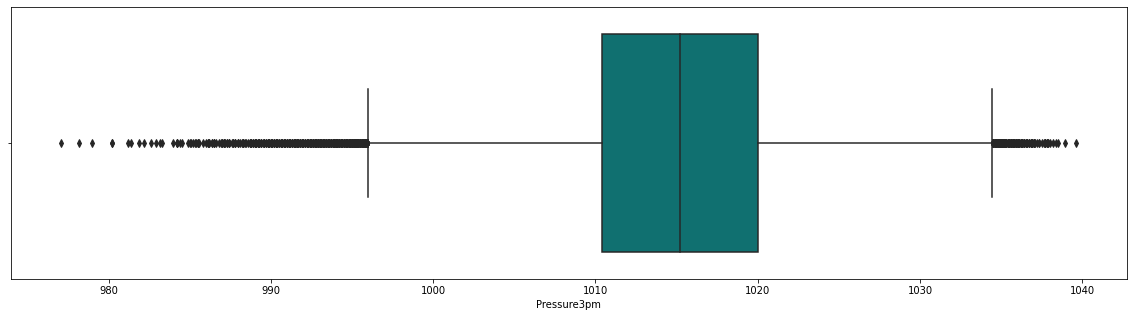

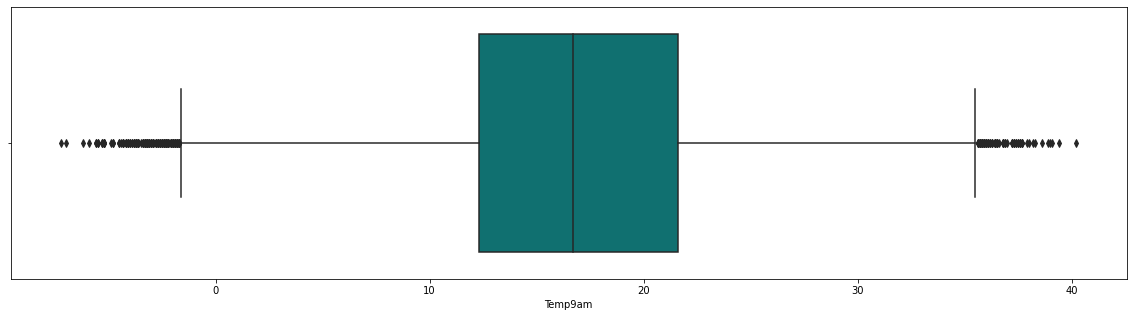

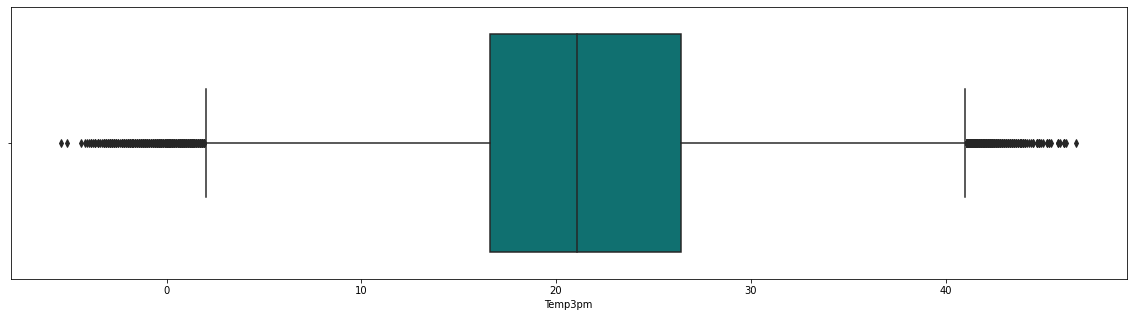

In [17]:
num_feature1=[feature for feature in num_feature if len(df[feature].unique())>25]
for feature in num_feature1:
    fig = plt.figure(figsize=(20, 5))
    sns.boxplot(df[feature],color='teal')
    plt.show()

In [18]:
Q1 = df[num_feature1].quantile(0.25)
Q3 = df[num_feature1].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MinTemp           9.3
MaxTemp          10.3
Rainfall          0.8
Evaporation       4.8
Sunshine          5.8
WindGustSpeed    17.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      29.0
Pressure9am       9.5
Pressure3pm       9.6
Temp9am           9.3
Temp3pm           9.8
dtype: float64


In [19]:
df.shape

(145460, 23)

In [20]:
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print("No. of rows remaining: ", df.shape[0])

No. of rows remaining:  112175


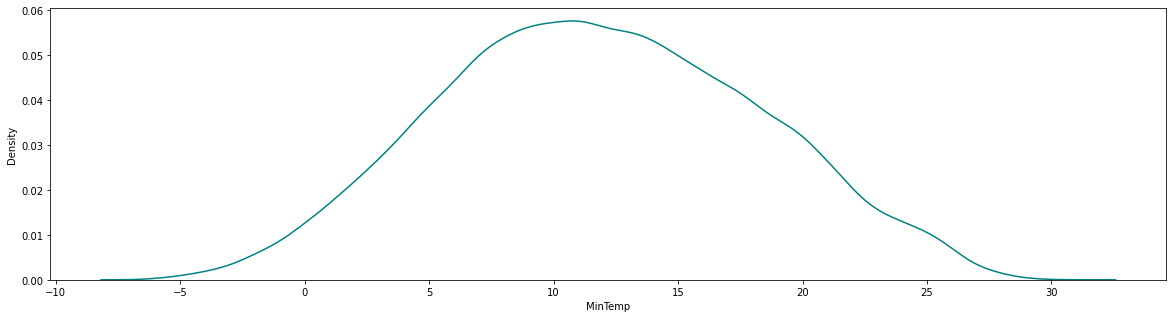

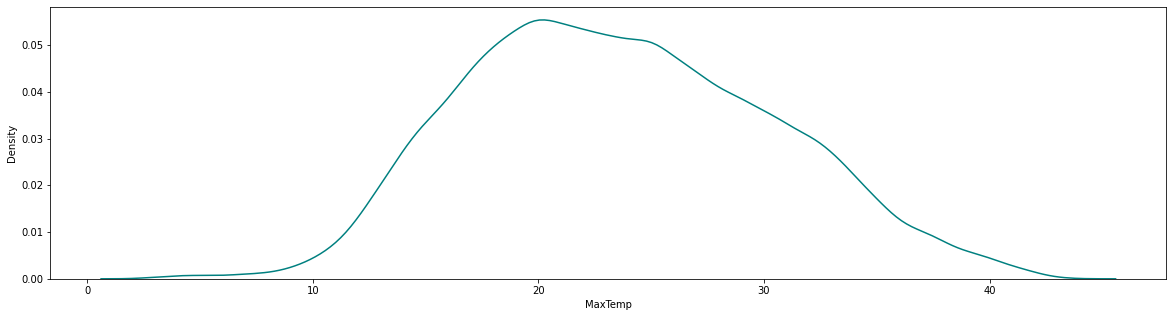

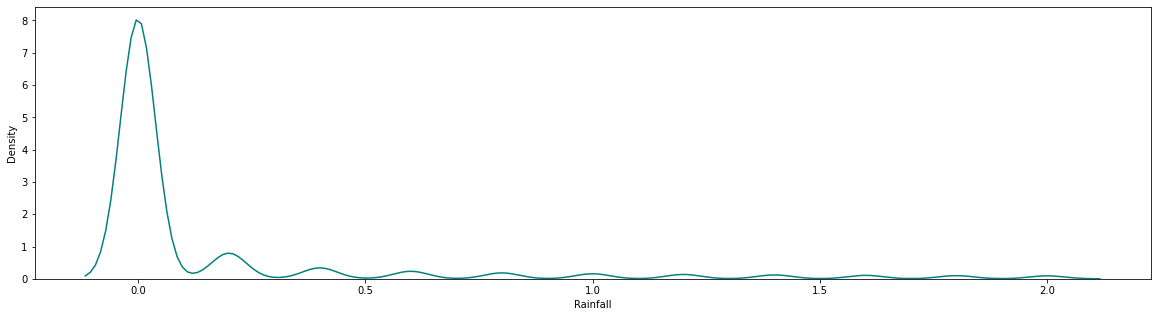

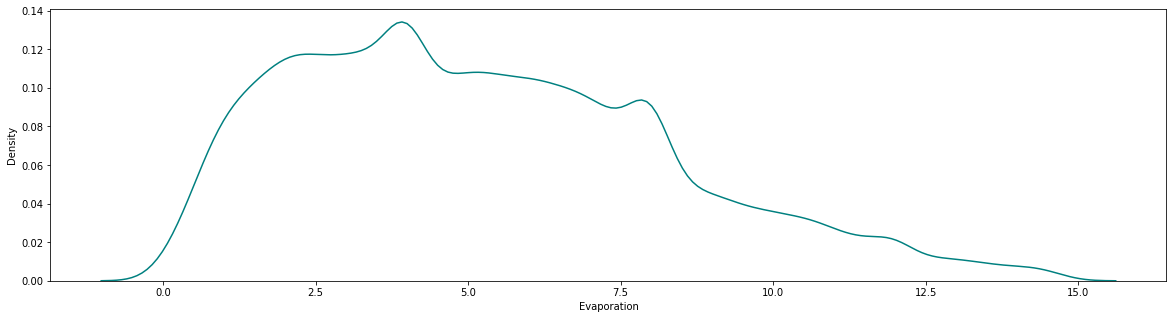

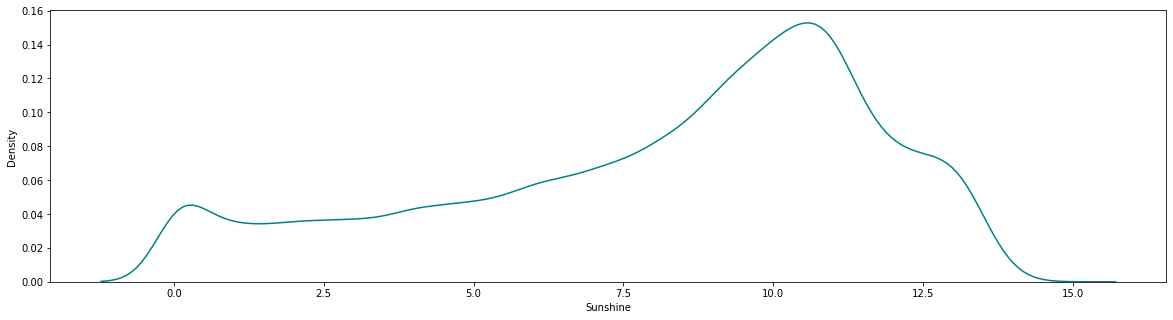

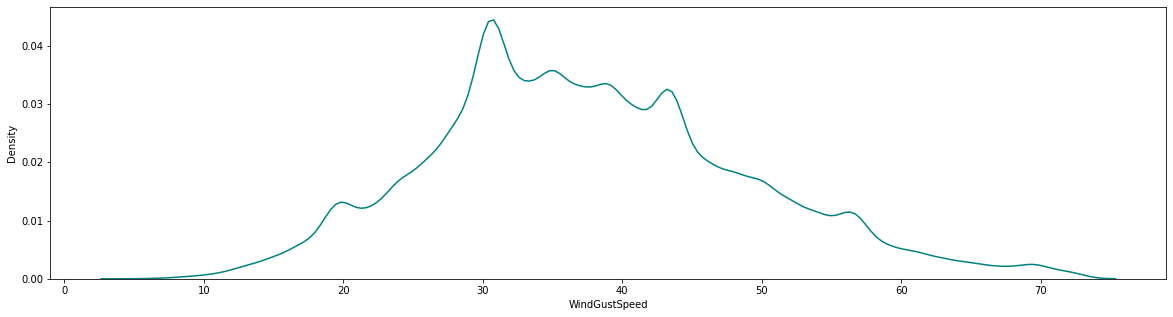

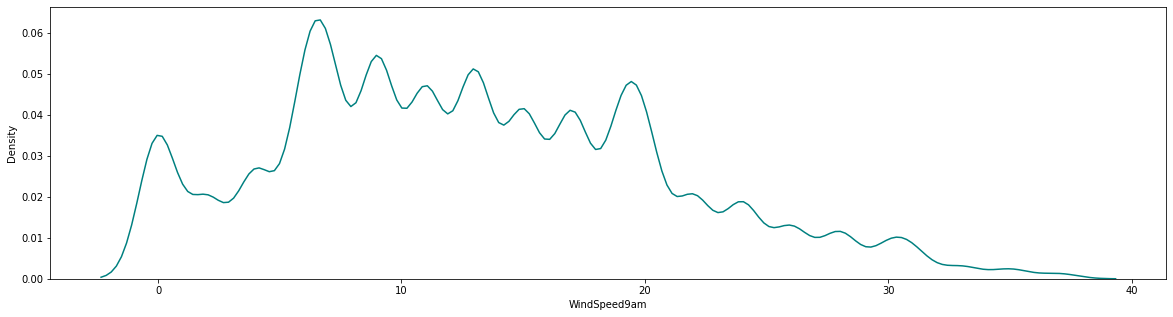

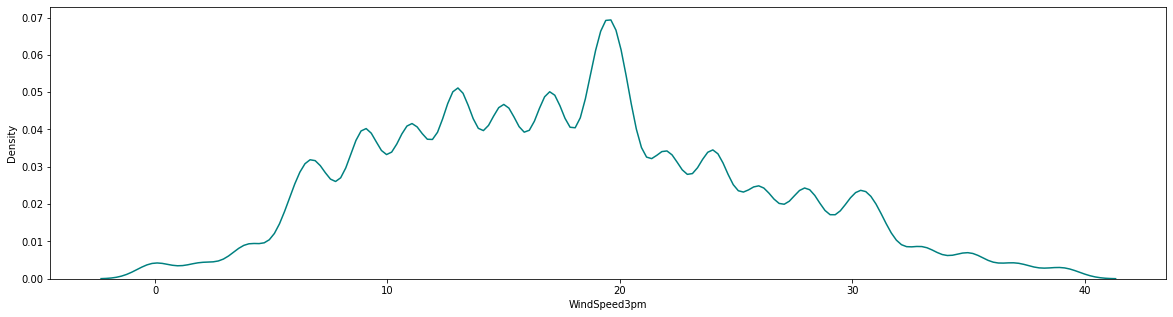

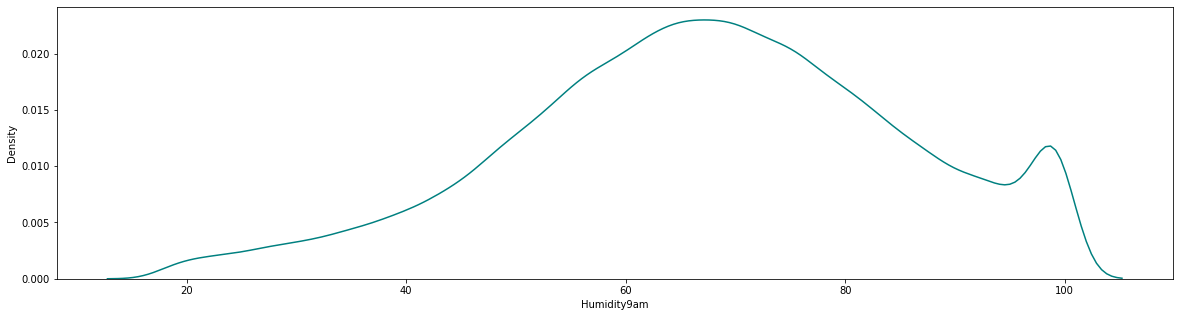

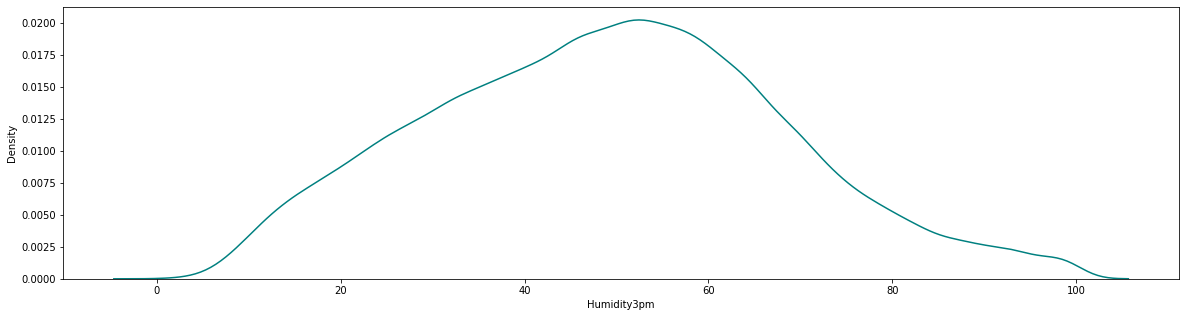

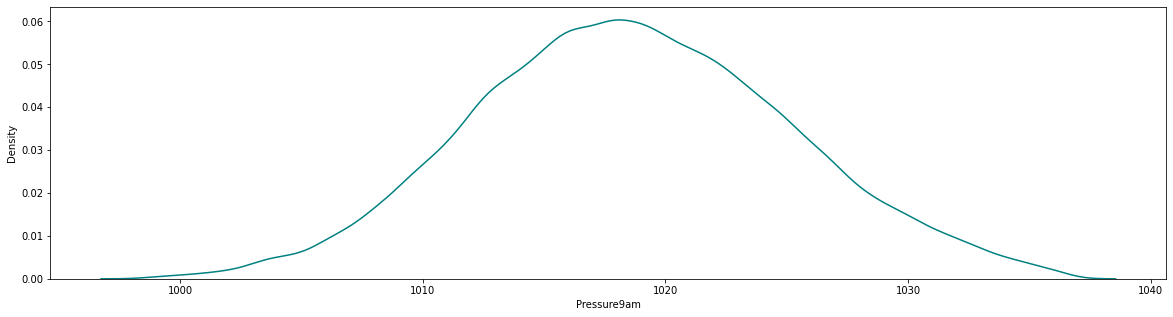

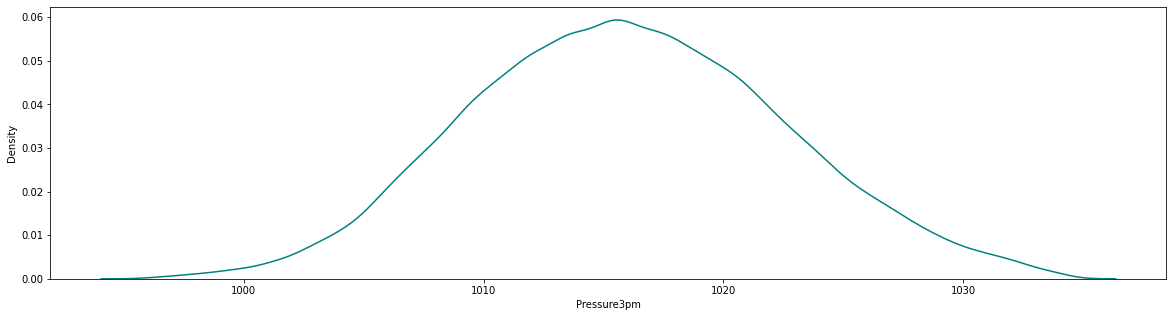

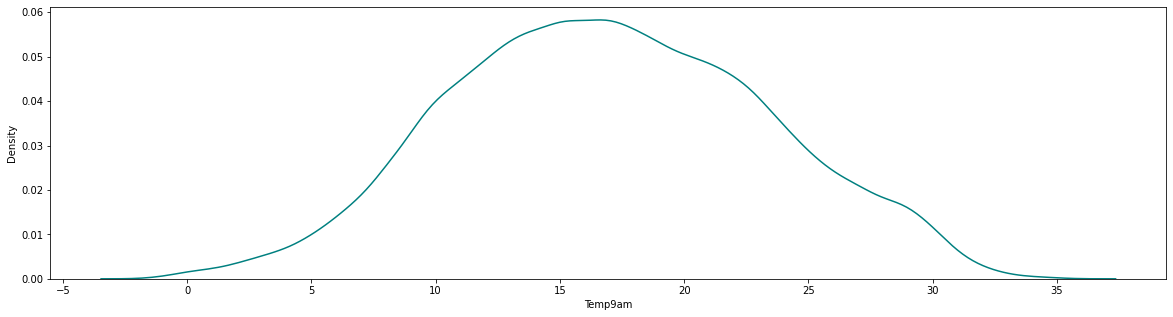

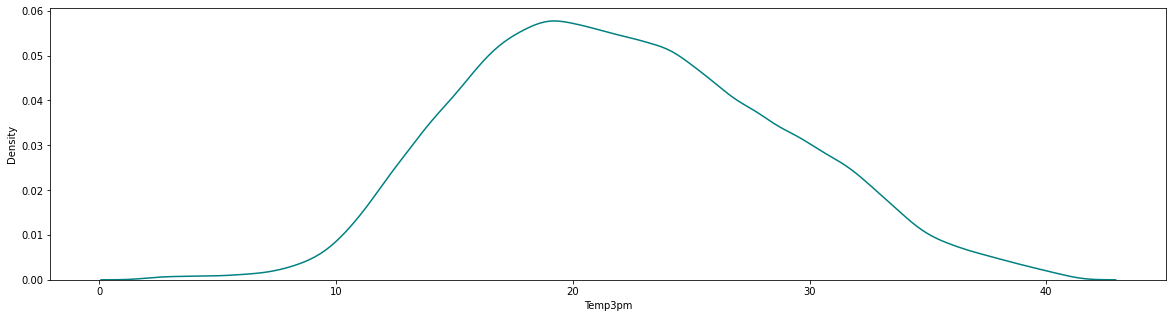

In [21]:
for feature in num_feature1:
    fig = plt.figure(figsize=(20, 5))
    sns.kdeplot(df[feature],color='teal',cbar=True)
    plt.show()

<AxesSubplot:xlabel='Rainfall', ylabel='count'>

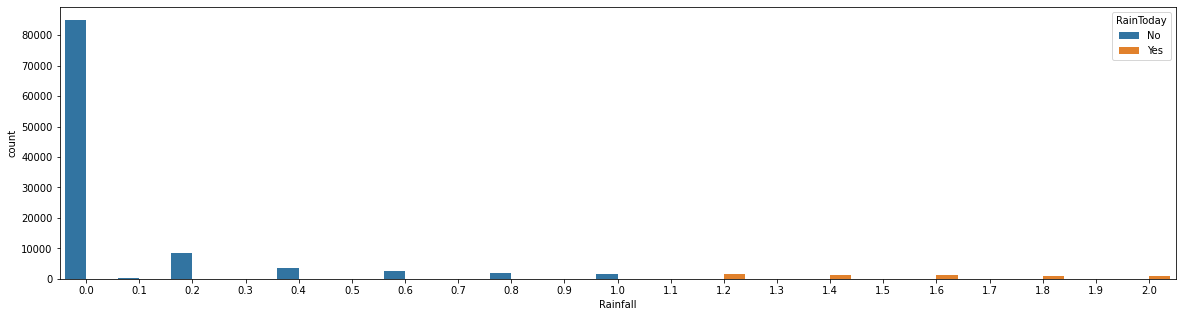

In [22]:
fig = plt.figure(figsize=(20, 5))
sns.countplot(df['Rainfall'],hue=df['RainToday'])

## Feature Engineering

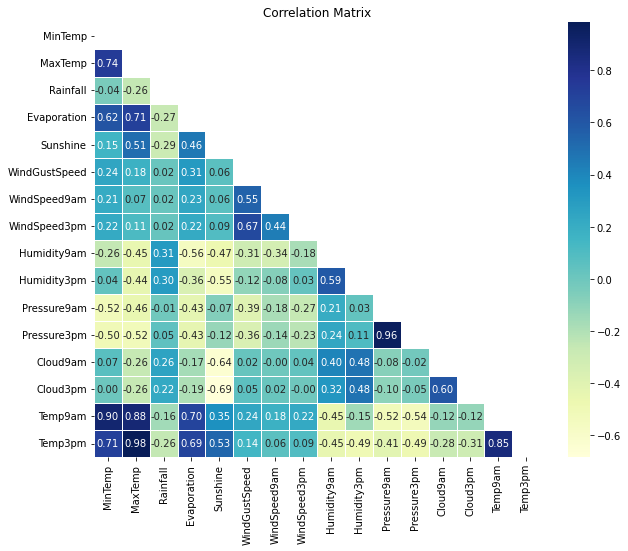

In [23]:
plt.figure(figsize = (10, 8))
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

In [24]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           1.165144
MaxTemp           0.979719
Rainfall          2.695788
Evaporation      43.687988
Sunshine         48.485848
WindGustDir       7.089815
WindGustSpeed     7.055048
WindDir9am        8.005349
WindDir3pm        2.985514
WindSpeed9am      1.331848
WindSpeed3pm      2.177847
Humidity9am       1.868509
Humidity3pm       3.145977
Pressure9am      10.598618
Pressure3pm      10.564743
Cloud9am         39.776242
Cloud3pm         42.165367
Temp9am           1.279251
Temp3pm           2.541565
RainToday         2.695788
RainTomorrow      2.417651
dtype: float64

In [25]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [26]:
corr_feature=correlation(df,0.85)
print(corr_feature)

{'Temp9am', 'Pressure3pm', 'Temp3pm'}


In [27]:
for feature in corr_feature:
    df.drop(feature,axis=1,inplace=True)

In [28]:
X = df.drop('Rainfall', axis=1)
X.corr(method='spearman')

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm
MinTemp,1.000000,0.740474,0.619222,0.153010,0.242660,0.212994,0.220656,-0.258281,0.037555,-0.515831,0.068344,0.003674
MaxTemp,0.740474,1.000000,0.711900,0.507958,0.175997,0.073798,0.113795,-0.451599,-0.442214,-0.455870,-0.264288,-0.264131
Evaporation,0.619222,0.711900,1.000000,0.460151,0.307671,0.234593,0.217529,-0.555034,-0.362984,-0.427949,-0.167132,-0.193526
Sunshine,0.153010,0.507958,0.460151,1.000000,0.061598,0.064373,0.094280,-0.472759,-0.554419,-0.069508,-0.642539,-0.685335
WindGustSpeed,0.242660,0.175997,0.307671,0.061598,1.000000,0.553792,0.667907,-0.306981,-0.116503,-0.393001,0.019863,0.054701
WindSpeed9am,0.212994,0.073798,0.234593,0.064373,0.553792,1.000000,0.442305,-0.339151,-0.076024,-0.180261,-0.004330,0.019171
WindSpeed3pm,0.220656,0.113795,0.217529,0.094280,0.667907,0.442305,1.000000,-0.181025,0.027745,-0.266777,0.038189,-0.001681
Humidity9am,-0.258281,-0.451599,-0.555034,-0.472759,-0.306981,-0.339151,-0.181025,1.000000,0.589742,0.208295,0.404233,0.319844
Humidity3pm,0.037555,-0.442214,-0.362984,-0.554419,-0.116503,-0.076024,0.027745,0.589742,1.000000,0.034073,0.481064,0.481488
Pressure9am,-0.515831,-0.455870,-0.427949,-0.069508,-0.393001,-0.180261,-0.266777,0.208295,0.034073,1.000000,-0.079443,-0.103414


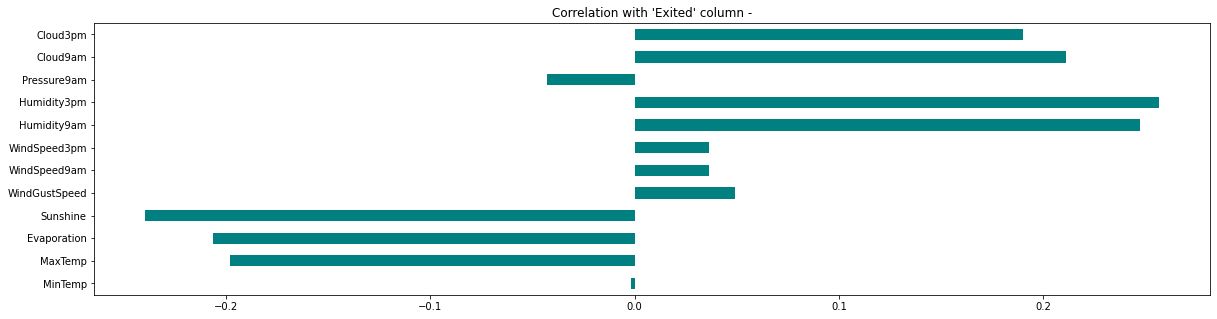

In [29]:
plt.figure(figsize=(20, 5))
X.corrwith(df['Rainfall']).plot(kind='barh', title="Correlation with 'Exited' column -",color='teal')
plt.show()

In [30]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           1.165144
MaxTemp           0.979719
Rainfall          2.695788
Evaporation      43.687988
Sunshine         48.485848
WindGustDir       7.089815
WindGustSpeed     7.055048
WindDir9am        8.005349
WindDir3pm        2.985514
WindSpeed9am      1.331848
WindSpeed3pm      2.177847
Humidity9am       1.868509
Humidity3pm       3.145977
Pressure9am      10.598618
Cloud9am         39.776242
Cloud3pm         42.165367
RainToday         2.695788
RainTomorrow      2.417651
dtype: float64

In [31]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
50821,01-02-2014,Tuggeranong,15.7,38.1,0.0,NaN,NaN,ENE,35.0,N,NNE,2.0,9.0,59.0,19.0,1014.1,NaN,NaN,No,No
61959,17-02-2011,Sale,17.3,24.0,0.0,4.0,0.9,WSW,28.0,WSW,SE,11.0,9.0,86.0,84.0,1012.9,7.0,8.0,No,Yes
21406,15-10-2009,NorfolkIsland,17.5,21.8,0.0,5.6,9.4,N,52.0,N,NNW,24.0,22.0,81.0,79.0,1015.3,6.0,1.0,No,No
80060,01-12-2014,Watsonia,21.3,30.0,0.0,13.2,8.9,NNE,43.0,NNW,SSE,9.0,9.0,53.0,46.0,1005.3,7.0,4.0,No,No
36647,29-04-2009,WaggaWagga,4.0,15.0,0.0,2.6,2.9,E,24.0,SE,NE,6.0,7.0,74.0,38.0,1022.6,7.0,7.0,No,No


In [32]:
for feature in ['Evaporation','Sunshine','Cloud9am',"Cloud3pm"]:
    df.drop(feature,axis=1,inplace=True)

In [33]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,No,No


In [34]:
for feature in df.columns:
    df[feature].ffill(inplace=True)

In [35]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day of week'] = df['Date'].dt.day_of_week
df['quarter'] = df['Date'].dt.quarter

df.drop('Date', axis = 1, inplace= True)

In [36]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,month,day,day of week,quarter
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,No,No,1,12,5,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,No,No,2,12,1,1
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,No,No,3,12,2,1
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,No,No,4,12,5,2
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,No,No,5,12,0,2


In [37]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [38]:
features=[feature for feature in df.columns if df[feature].dtype=='O']

In [39]:
for feature in features:
    df[feature]=encode.fit_transform(df[feature])

In [40]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,month,day,day of week,quarter
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,0,0,1,12,5,1
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,0,0,2,12,1,1
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,0,0,3,12,2,1
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,0,0,4,12,5,2
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,0,0,5,12,0,2


## Scaling

In [41]:
import scipy.stats as stats
def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(20, 5))
    fig.subplots_adjust(right=1.5)
    
    plt.subplot(1, 3, 1)
    sns.distplot(data[col], kde=True, color='pink')
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(data[col],color='pink')
    plt.title('Box Plot')
    
    plt.show()

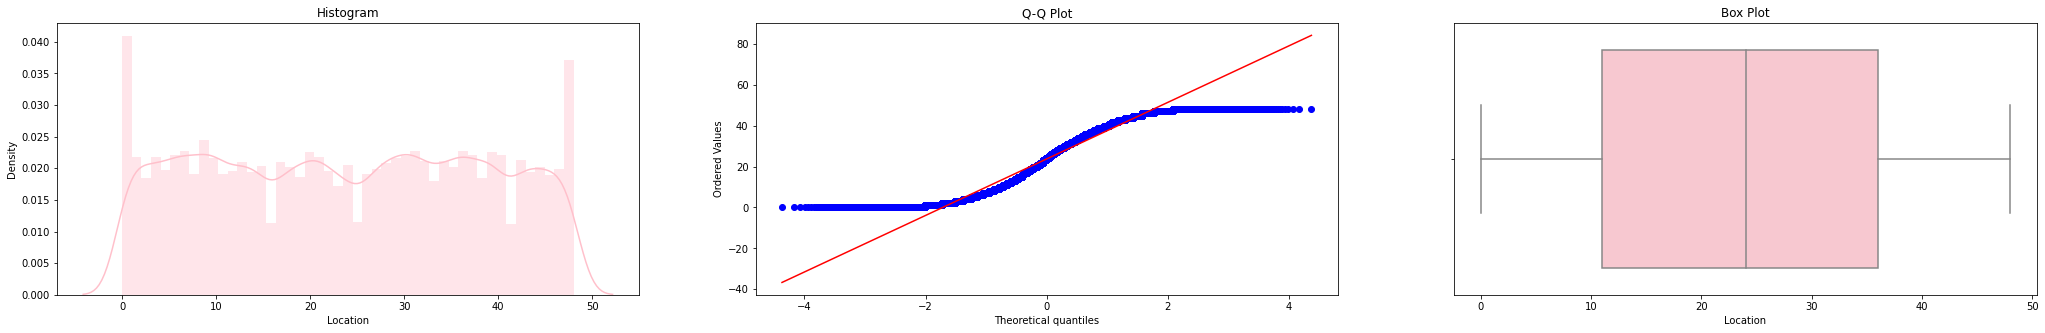

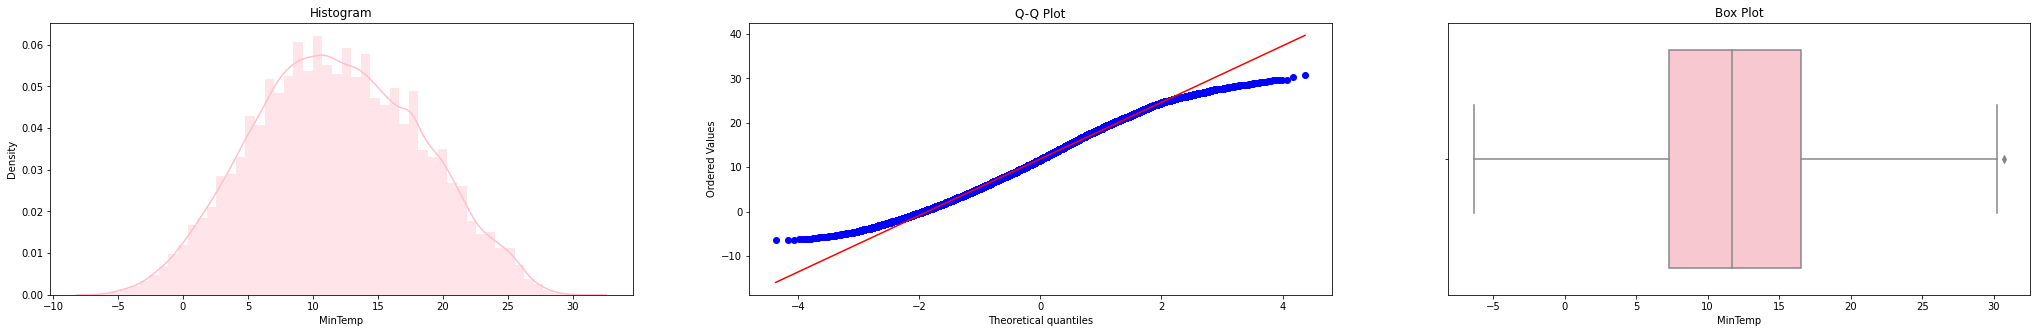

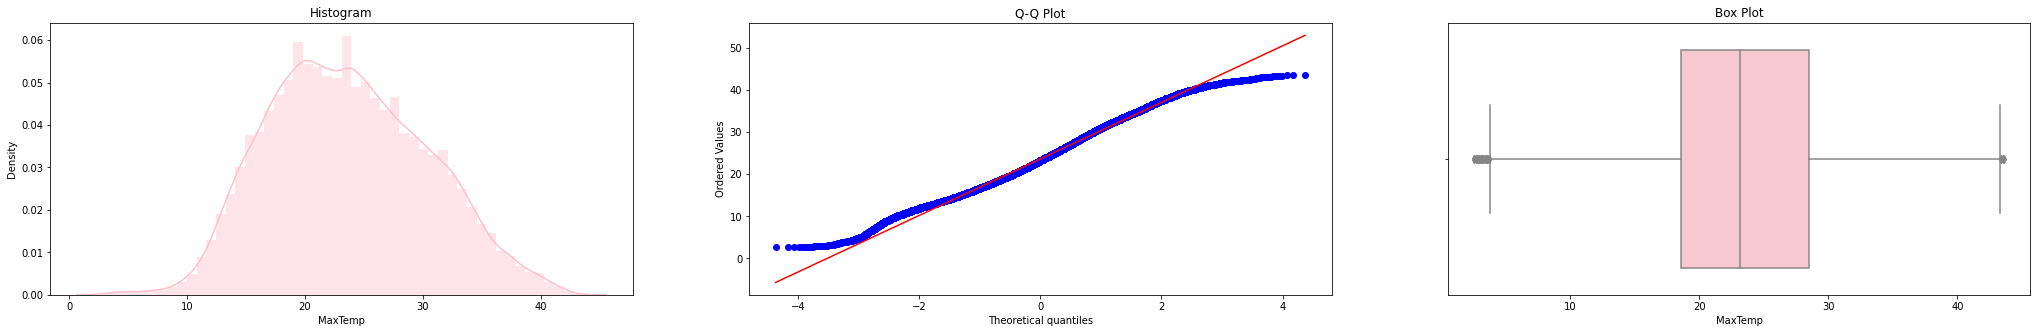

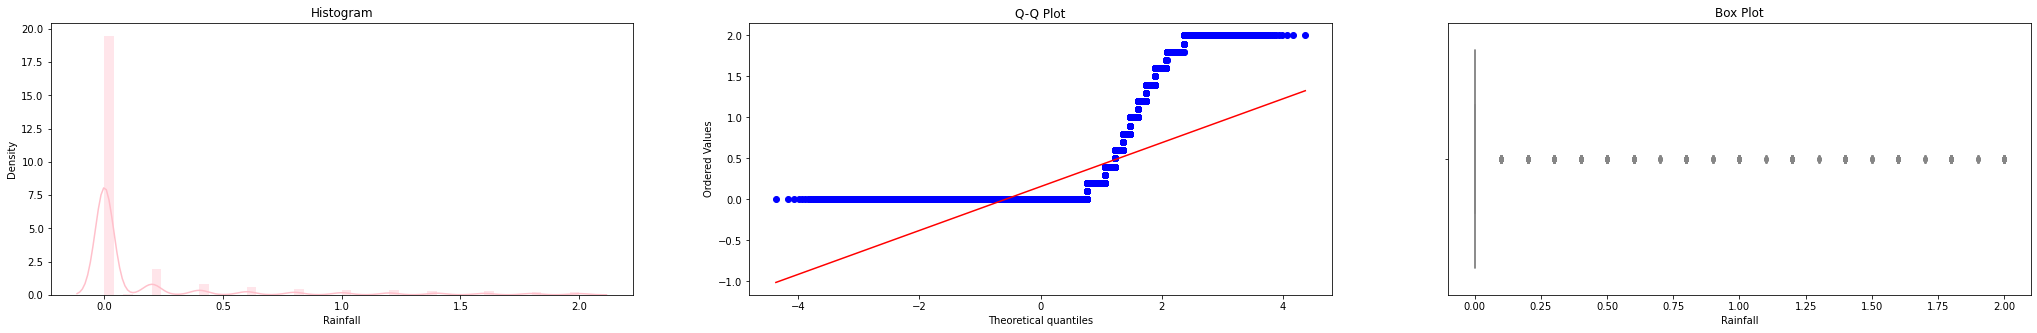

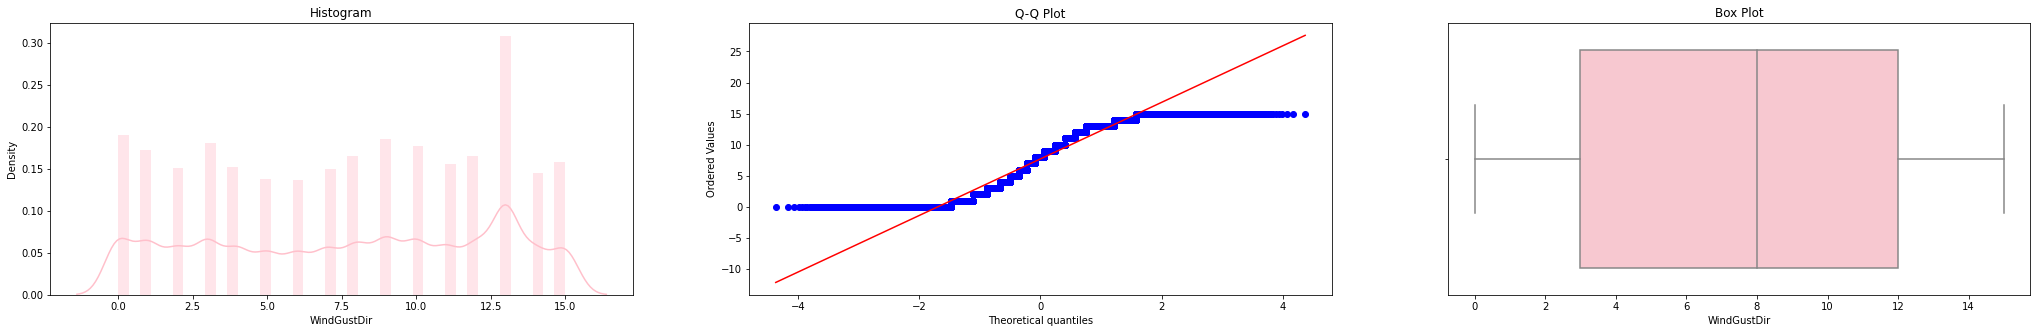

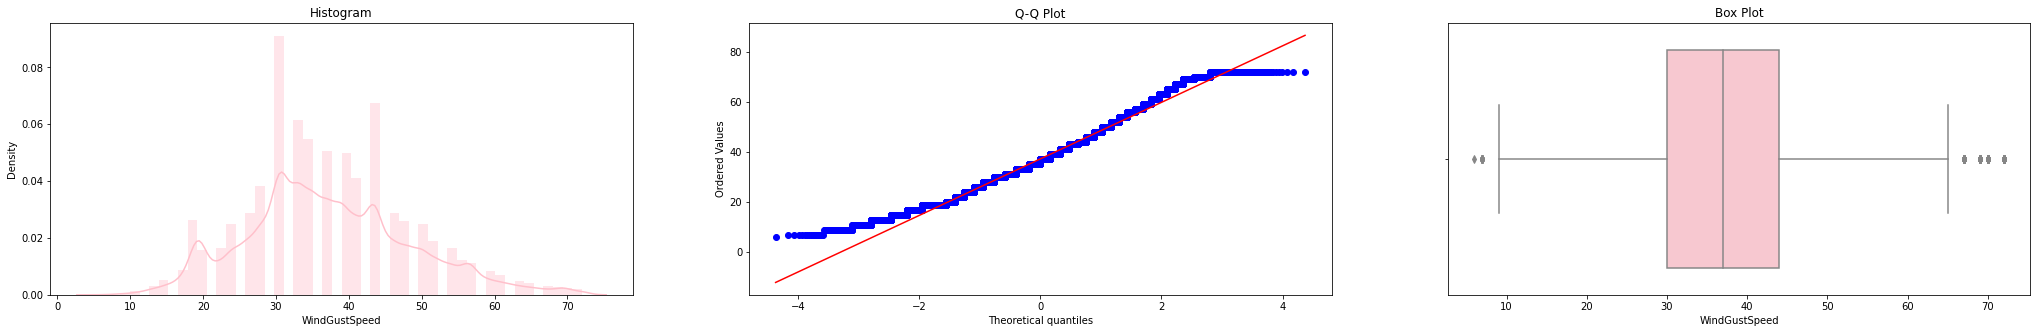

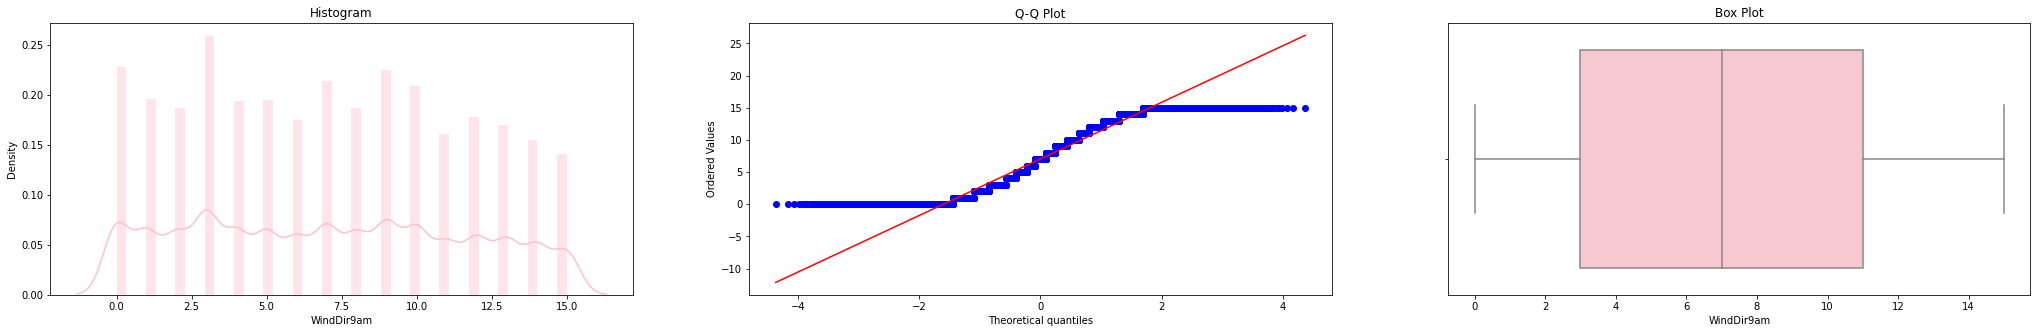

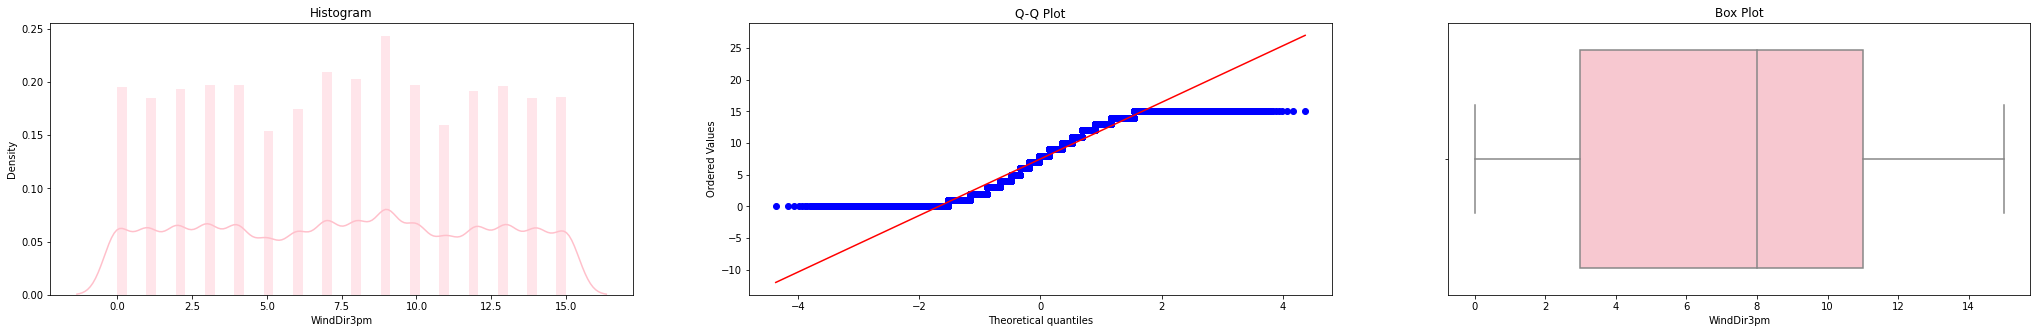

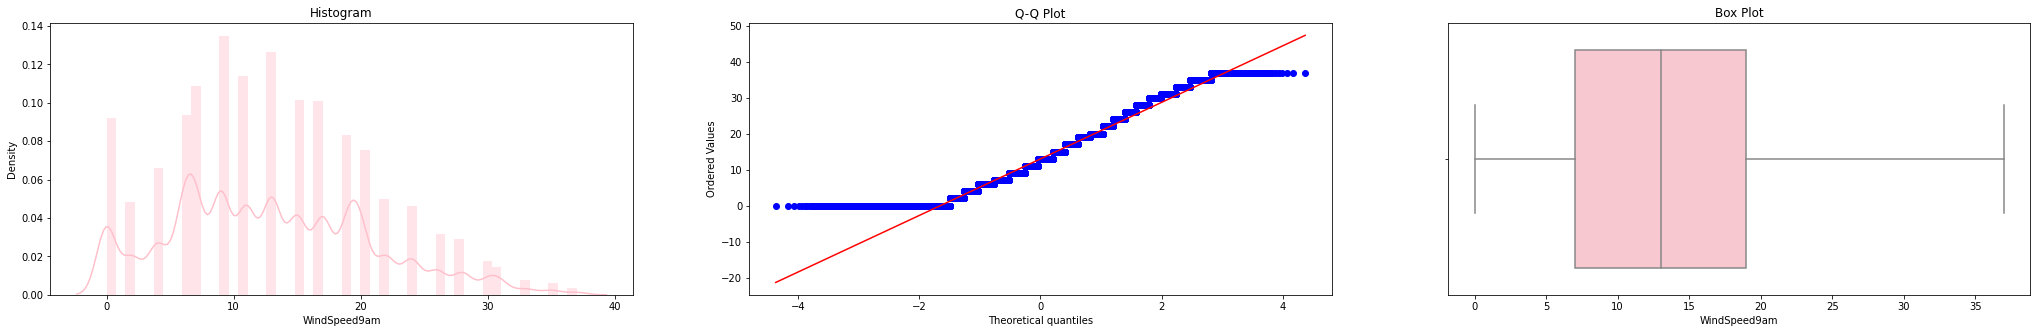

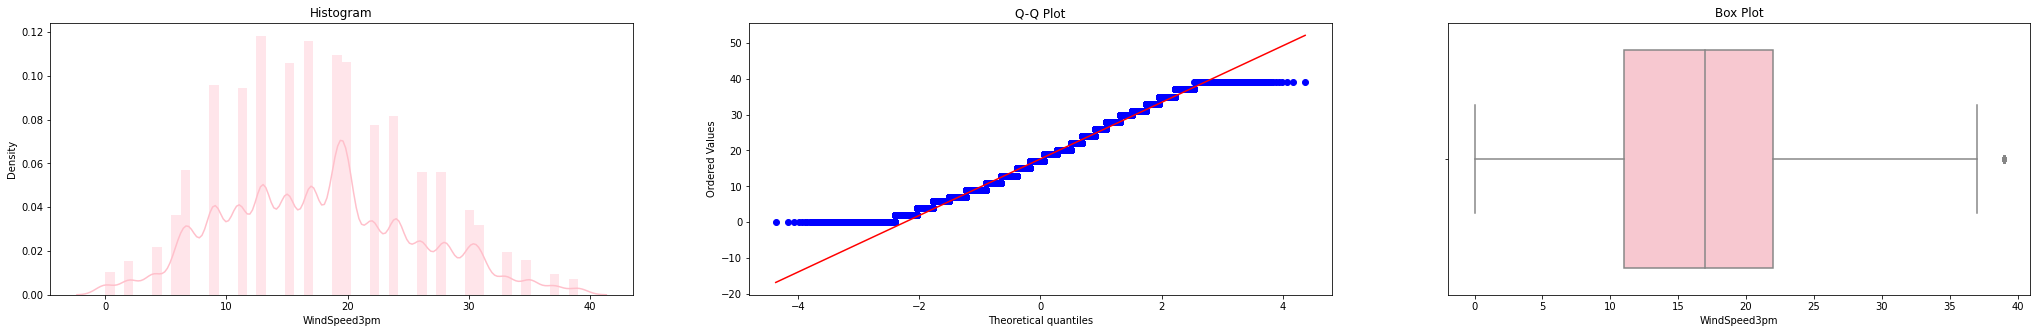

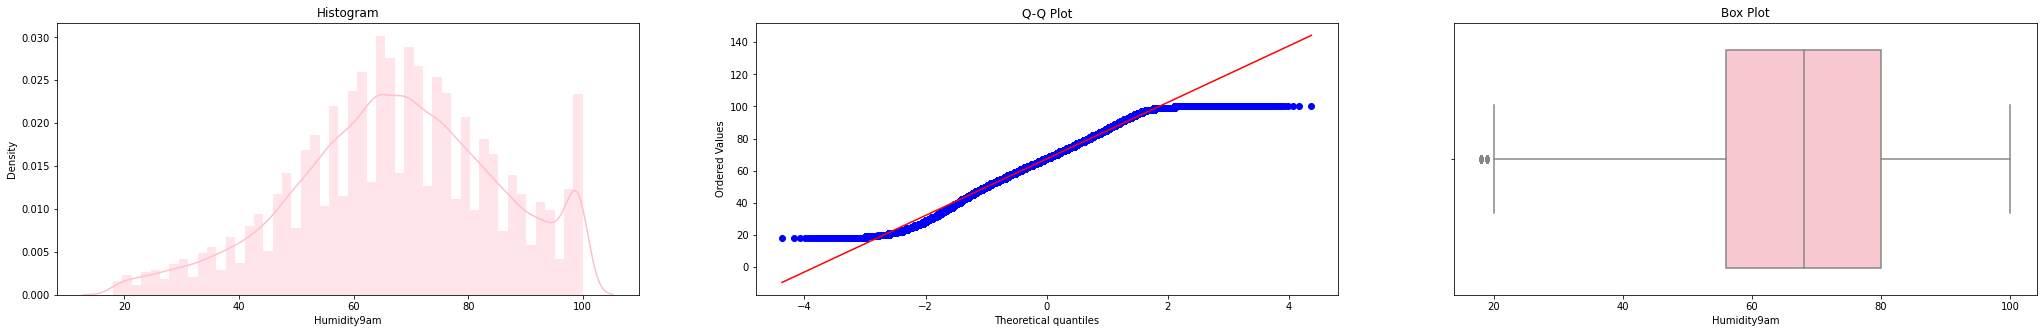

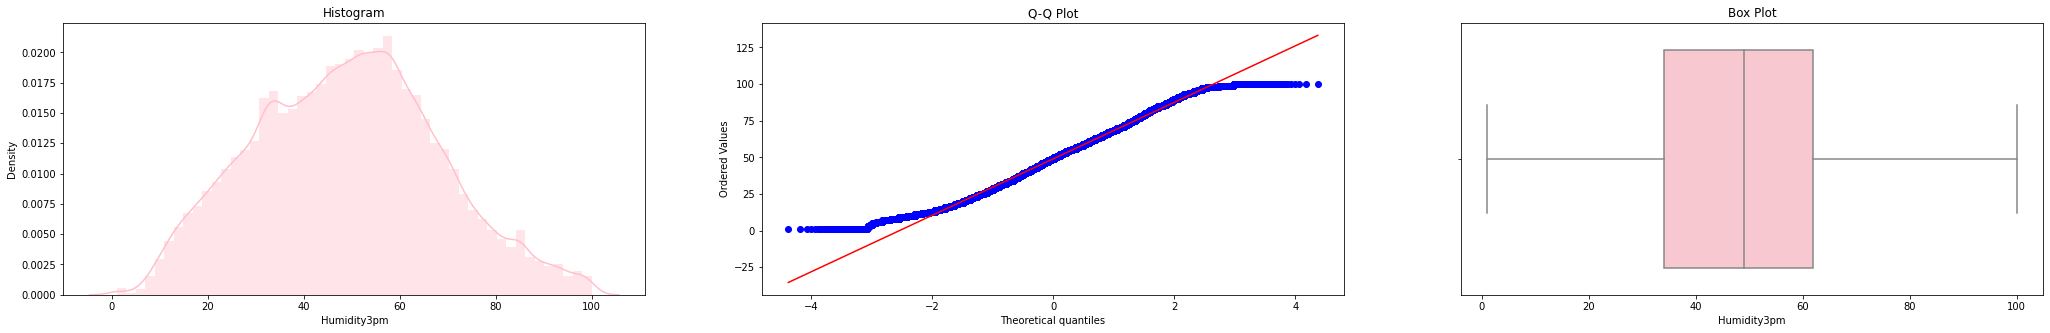

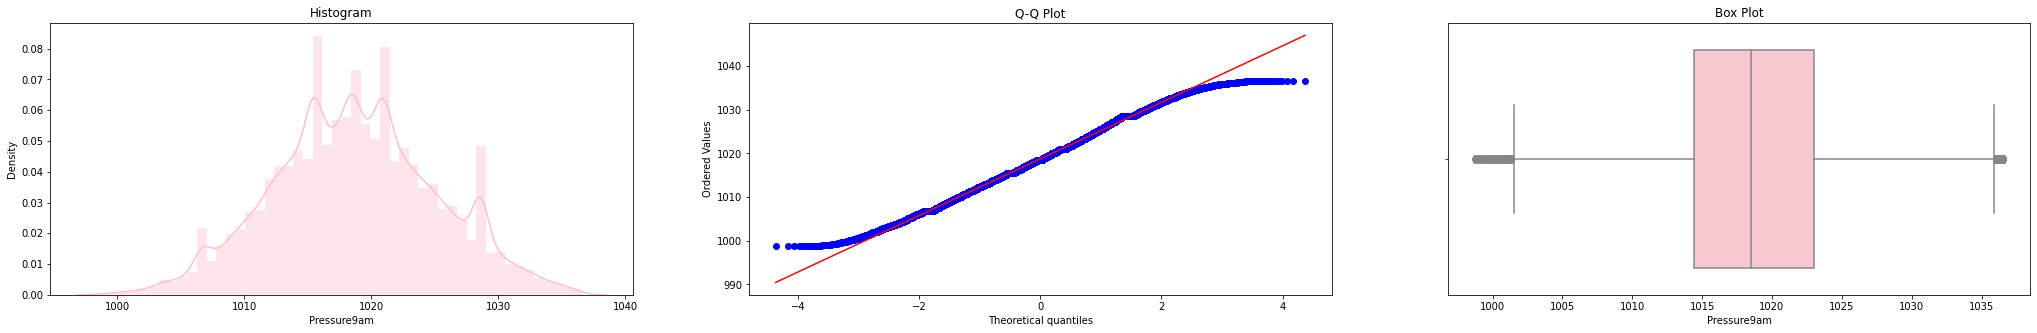

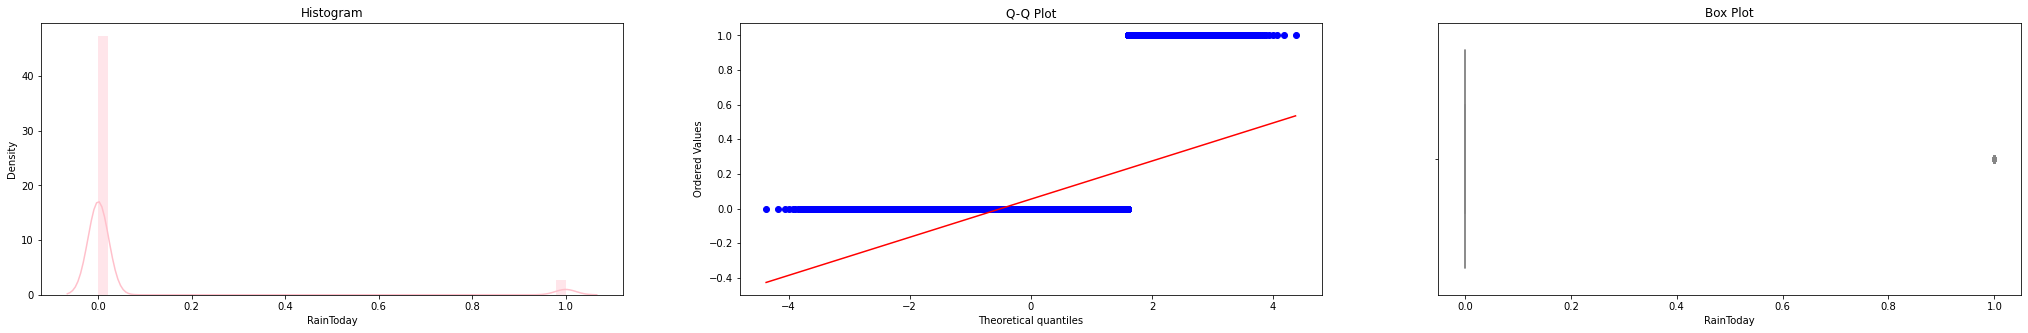

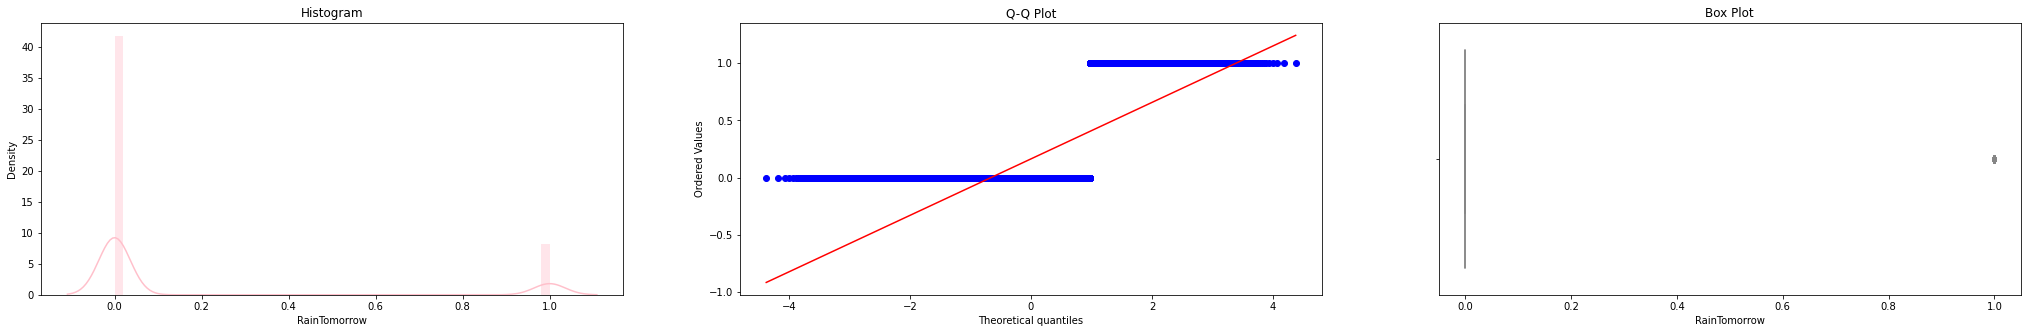

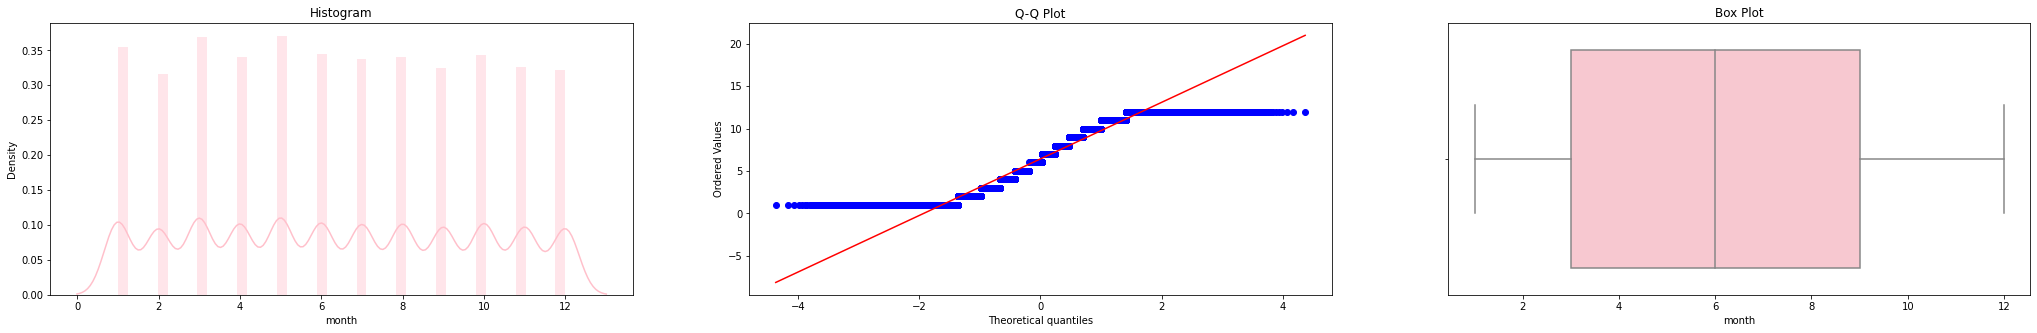

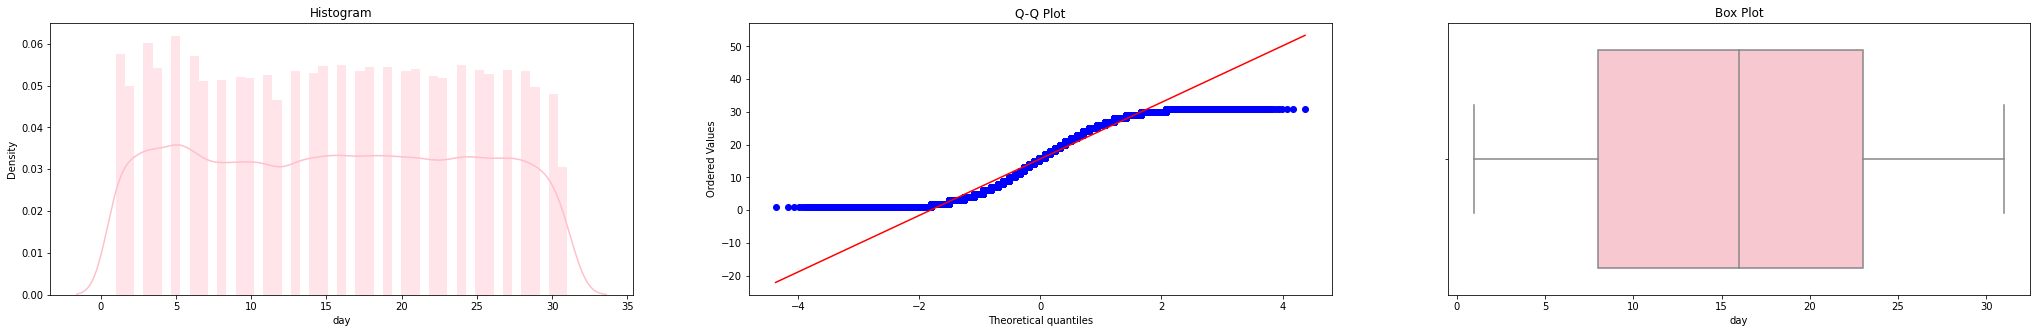

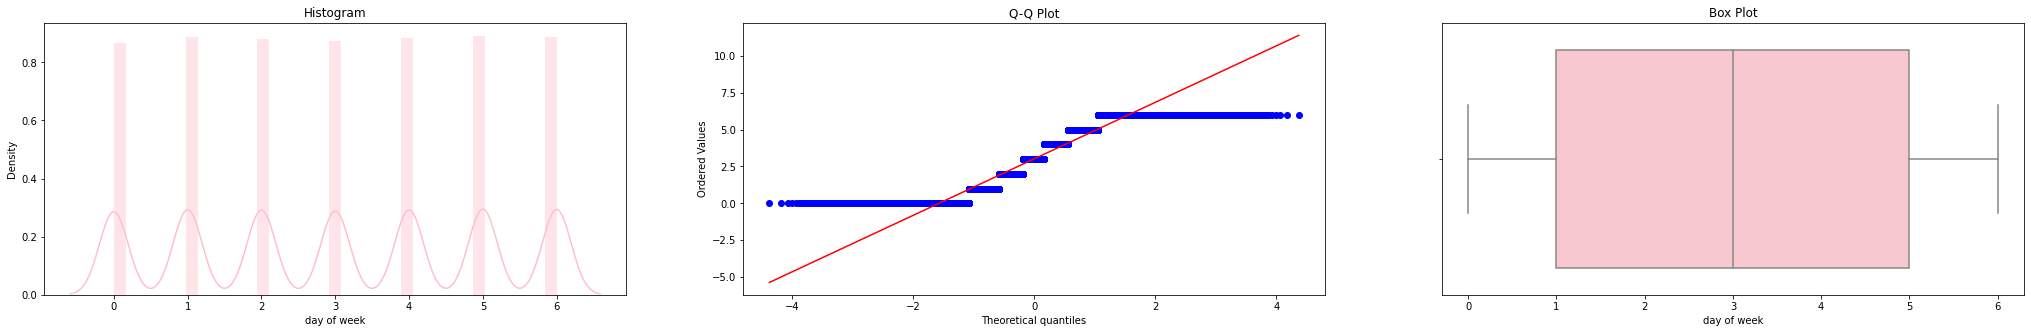

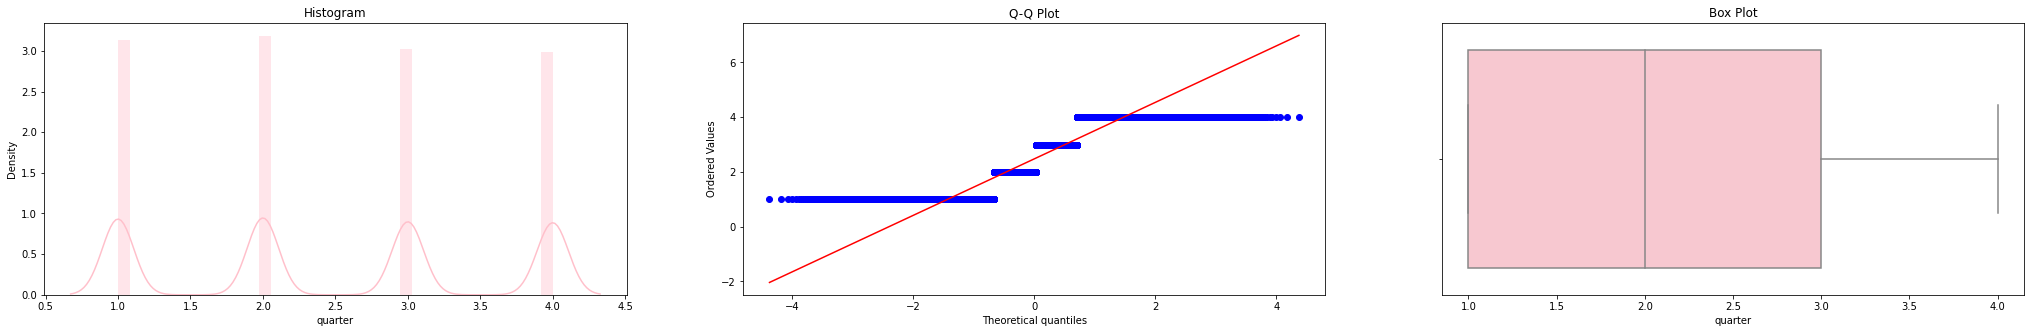

In [42]:
for col in df.columns:
    diagnostic_plot(df, col)

In [43]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,month,day,day of week,quarter
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,0,0,1,12,5,1
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,0,0,2,12,1,1
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,0,0,3,12,2,1
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,0,0,4,12,5,2
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,0,0,5,12,0,2


In [44]:
x=df.drop('Rainfall',axis=1)

In [45]:
x

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,month,day,day of week,quarter
0,2,13.4,22.9,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,0,0,1,12,5,1
1,2,7.4,25.1,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,0,0,2,12,1,1
2,2,12.9,25.7,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,0,0,3,12,2,1
3,2,9.2,28.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,0,0,4,12,5,2
4,2,17.5,32.3,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,0,0,5,12,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,0,0,6,21,2,2
145456,41,3.6,25.3,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,0,0,6,22,3,2
145457,41,5.4,26.9,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,0,0,6,23,4,2
145458,41,7.8,27.0,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,0,0,6,24,5,2


In [46]:
y=df.iloc[:,[3]]

In [47]:
y

,Rainfall
0,0.6
1,0.0
2,0.0
3,0.0
4,1.0
...,...
145455,0.0
145456,0.0
145457,0.0
145458,0.0


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (89740, 18)
X_test: (22435, 18)
Y_train: (89740, 1)
Y_test: (22435, 1)


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Using Ridge Regressor For Prediction

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [52]:
ridge=Ridge()

In [53]:
parameter={'alpha':[1,0.5,0.1,0.01,5,10,50,100]}
ridgecv=GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.5, 0.1, 0.01, 5, 10, 50, 100]},
             scoring='neg_mean_squared_error')

In [54]:
print(ridgecv.best_params_)

{'alpha': 10}


In [55]:
ridge_pred=ridgecv.predict(x_test)

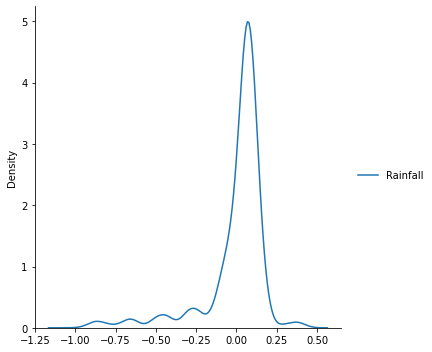

In [56]:
sns.displot(ridge_pred-y_test,kind='kde')

In [57]:
from sklearn.metrics import r2_score
score=r2_score(ridge_pred,y_test)

In [58]:
RR_Train=ridgecv.score(x_train,y_train)
RR_Test=ridgecv.score(x_test,y_test)

In [59]:
score

0.6661406216493353

## Using Gradient Boost Regressor For Prediction

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
print("Training score:",GB.score(x_train,y_train))
print("Testing score:",GB.score(x_test,y_test))
GB_Train=GB.score(x_train,y_train)
GB_Test=GB.score(x_test,y_test)

Training score: 0.7643372065137038
Testing score: 0.7570858442945984


## Using Random Forest Regressor for Prediction

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
print("Training score:",rf.score(x_train,y_train))
print("Testing score:",rf.score(x_test,y_test))
RF_Train=rf.score(x_train,y_train)
RF_Test=rf.score(x_test,y_test)

Training score: 0.9660872304613614
Testing score: 0.7563884536258116


## Using AdaBoost Regressor for Prediction

In [62]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
print("Training score:",ab.score(x_train,y_train))
print("Testing score:",ab.score(x_test,y_test))
AB_Train=ab.score(x_train,y_train)
AB_Test=ab.score(x_test,y_test)

Training score: 0.6975781889047048
Testing score: 0.6962760741747638


## Using KNN Regressor for Prediction

In [63]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
print("Training score:",knn.score(x_train,y_train))
print("Testing score:",knn.score(x_test,y_test))
knn_Train=knn.score(x_train,y_train)
knn_Test=knn.score(x_test,y_test)

Training score: 0.813824516141499
Testing score: 0.7171804665144464


In [64]:
modell=['Ridge Regressor','Gradient Boosting','Random Forest Regressor','AdaBoost','KNN Regressor']
train=[RR_Train,GB_Train,RF_Train,AB_Train,knn_Train]
test=[RR_Test,GB_Test,RF_Test,AB_Test,knn_Test]

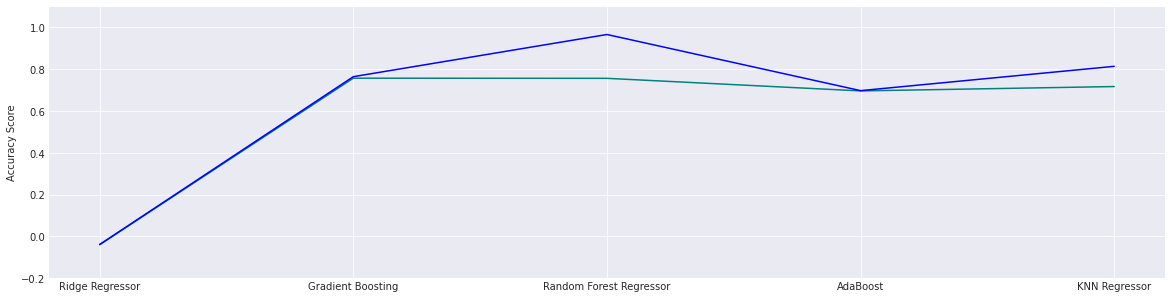

In [65]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 5))
plt.plot(modell,test, color='teal')
plt.plot(modell,train, color='blue')
plt.ylim(-0.2, 1.1)
plt.ylabel("Accuracy Score")
plt.show()